# PCA Dimensionality Reduction

In [34]:
''' Needed libraries '''

import numpy as np # For matrix operations and numerical processing
import matplotlib.pyplot as plt # For plotting
import os, sys # For filepaths

In [35]:
''' Add the datasets and libraries to the system path '''

# Find the path to our implementations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
libraries_path = os.path.join(parent_directory, 'Libraries')

# Find the path to the datasets
datasets_path = os.path.join(parent_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)
sys.path.append(libraries_path)

In [36]:
''' Import our implementation of PCA '''

from ajp import pca_ajp

In [27]:
''' Load the dataset '''

dataset = np.load(os.path.join(datasets_path, 'fashion_train.npy'))
print("Dataset shape: ", dataset.shape)

Dataset shape:  (10000, 785)


In [28]:
''' Divide the dataset into images and labels  '''

images = dataset[:, :-1]  # Define the images as all columns except the last one
labels = dataset[:, -1] # Define the labels as the last column

In [29]:
''' Dictionary for the labels '''

labels_dict = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Shirt"
}

Label:  4 Shirt


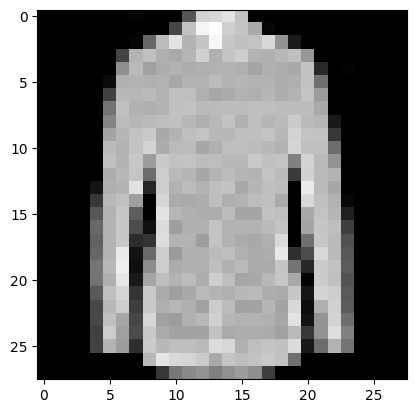

In [37]:
''' Plot a random image from the dataset '''

index = np.random.randint(0, len(images))
image = images[index]
label = labels[index]
label_name = labels_dict[label]
print("Label: ", label, label_name)
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.show()

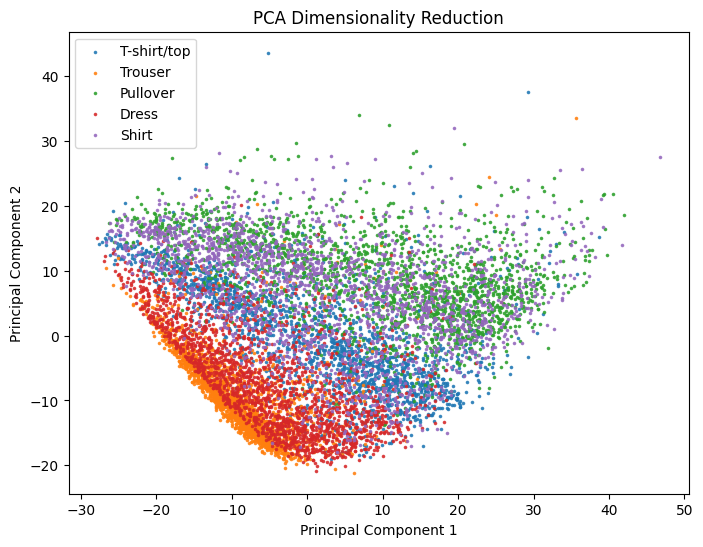

In [38]:
''' Dimensionality reduction with PCA '''

pca = pca_ajp(n_components=2)
pca.fit(images)
images_transformed = pca.transform(images)

plt.figure(figsize=(8, 6))
for label_value in np.unique(labels):
    indices = np.where(labels == label_value)
    plt.scatter(images_transformed[indices, 0], images_transformed[indices, 1], label=labels_dict[label_value], s=10, alpha=0.8, marker='.', linewidths=1)

plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

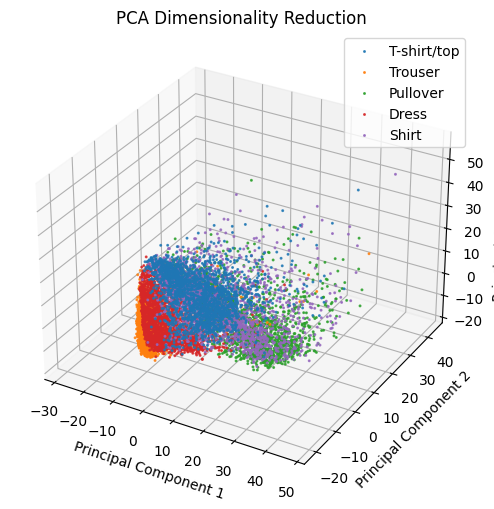

In [41]:
''' Plotting in 3D with matplotlib '''

pca = pca_ajp(n_components=3)
pca.fit(images)
images_transformed = pca.transform(images)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for label_value in np.unique(labels):
    indices = np.where(labels == label_value)
    ax.scatter(images_transformed[indices, 0], images_transformed[indices, 1], images_transformed[indices, 2], label=labels_dict[label_value], s=5, alpha=0.8, marker='.', linewidths=1)

ax.set_title('PCA Dimensionality Reduction')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

In [43]:
''' Plotting an interactive 3D plot with plotly '''
# pip install plotly, nbformat

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

pca = pca_ajp(n_components=3)
pca.fit(images)
images_transformed = pca.transform(images)

data = []

for label_value in np.unique(labels):
    indices = np.where(labels == label_value)
    trace = go.Scatter3d(
        x=images_transformed[indices, 0].flatten(),
        y=images_transformed[indices, 1].flatten(),
        z=images_transformed[indices, 2].flatten(),
        hovertext=np.array([labels_dict[label_value] for i in range(len(indices[0]))]),
        mode='markers',
        name=labels_dict[label_value],
        marker=dict(
            size=1,
            opacity=0.8
        )
    )
    data.append(trace)

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)